# Exploratory Data Analysis on Seattle Airbnb Data

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#data-wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a name='intro'></a>
## Introduction

In this project, exploratory data analysis was performed on Seattle Airbnb data with the aim of answering some questions related to the price of accomodations on Airbnb. Specifically, the data was used to answer the following questions.

- How does price vary with different types of properties?
- How do review scores affect the price?
- How does price fluctuate over different months?

The data can be found at [here](https://www.kaggle.com/airbnb/seattle/data).

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data from CSV files
df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')

In [4]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


<a name='data-wrangling'></a>
## Data Wrangling

Data wrangling is performed on the dataset to clean the data, as well as to understand the data better. There are two steps to be carried out for data wrangling, which are data assessing and data cleaning. To answer the questions stated in the introduction, only certain columns of listings.csv and calendar.csv are needed, and therefore cleaned.

### Data Assessing

Data is assessed using programmatic assessment to look for data quality and tidiness issues

In [6]:
# Let check the data types of variables that will be used in subsequent analyses
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [7]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
# Check if there is any duplicate data
print('Number of duplicates in listing.csv: {}'.format(df_listings.duplicated().sum()))
print('Number of duplicates in calendar.csv: {}'.format(df_calendar.duplicated().sum()))

Number of duplicates in listing.csv: 0
Number of duplicates in calendar.csv: 0


In [9]:
# Check if there is any abnormal values in 'property_type' column of listing.csv
df_listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [10]:
# Check if there is any abnormal values in 'review_scores_rating' column of listing.csv
df_listings[['review_scores_rating']].describe()

,review_scores_rating
count,3171.000000
mean,94.539262
std,6.606083
min,20.000000
25%,93.000000
50%,96.000000
75%,99.000000
max,100.000000


In [11]:
# Get columns of listing.csv with more than 25 % of their values missing
df_listings.columns[df_listings.isnull().mean() > 0.25 ]

Index(['neighborhood_overview', 'notes', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'license'],
      dtype='object')

In [12]:
# Check if there is any abnormal values in 'date' column of calendar.csv
df_calendar['date'].unique()

array(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
       '2016-01-08', '2016-01-09', '2016-01-10', '2016-01-11',
       '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
       '2016-01-16', '2016-01-17', '2016-01-18', '2016-01-19',
       '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-23',
       '2016-01-24', '2016-01-25', '2016-01-26', '2016-01-27',
       '2016-01-28', '2016-01-29', '2016-01-30', '2016-01-31',
       '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
       '2016-02-05', '2016-02-06', '2016-02-07', '2016-02-08',
       '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12',
       '2016-02-13', '2016-02-14', '2016-02-15', '2016-02-16',
       '2016-02-17', '2016-02-18', '2016-02-19', '2016-02-20',
       '2016-02-21', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-27', '2016-02-28',
       '2016-02-29', '2016-03-01', '2016-03-02', '2016-03-03',
       '2016-03-04', '2016-03-05', '2016-03-06', '2016-

In [13]:
# Check if there is any abnormal values in 'available' column of calendar.csv
df_calendar['available'].unique()

array(['t', 'f'], dtype=object)

#### Assessment Summary
- There is no duplicate data.
- There are missing values in 'review_scores_rating' and 'property_type' (they are among the columns of interest for subsequent analyses), but the percentage of missing values in these columns is not more than 25%. Since these missing values will not affect our subsequent analyses, they will be ignored.
- The data type of 'price' column in listings.csv and calendar.csv should be float instead of string.
- The data type of 'date' column in calendar.csv should datetime instead of string.
- Day in the dates of 'date' column should be removed to reduce the number of unique dates for easier analyses and vizualization. For example, 2016-12-01 should become 2016-12.
- 'property_type' column from listings.csv should be added to calendar.csv for subsequent analysis.

### Data Cleaning
Data is cleaned based on the issues that were detected during data quality and tidiness assessment, as summarized in assessment summary.

In [14]:
# Make a copy of the dataframe
df_listings_clean = df_listings.copy()
df_calendar_clean = df_calendar.copy()

Step 1: Remove '$' and ',' from 'price' column in listings.csv and calendar.csv and convert it to float

In [15]:
# Remove '$' and ',' in 'price' column of listings.csv and calendar.csv
df_listings_clean['price'] = df_listings_clean['price'].str.replace('$', '').str.replace(',', '')
df_calendar_clean['price'] = df_calendar_clean['price'].str.replace('$', '').str.replace(',', '')

# Convert data type of 'price' column to float
df_listings_clean['price'] = df_listings_clean['price'].astype(float)
df_calendar_clean['price'] = df_calendar_clean['price'].astype(float)

In [16]:
# Verify that Step 1 is carried out correctly
df_listings_clean[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 1 columns):
price    3818 non-null float64
dtypes: float64(1)
memory usage: 29.9 KB


In [17]:
df_calendar_clean[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 1 columns):
price    934542 non-null float64
dtypes: float64(1)
memory usage: 10.6 MB


In [18]:
df_listings_clean['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

Step 2: Convert data type of 'date' column in calendar.csv to 'datetime' and remove day from dates

In [19]:
# Convert data type of 'date' column to datetime
df_calendar_clean['date'] = pd.to_datetime(df_calendar_clean['date'], 
                                           format='%Y-%m-%d').apply(lambda x: x.strftime('%Y-%m'))

In [20]:
# Verify that Step 2 is carried out correctly
df_calendar_clean['date'].unique()

array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01'], dtype=object)

Step 3: Join 'property_type' column from listings.csv with calendar.csv

In [21]:
# Join 'property_type' column from listings.csv with calendar.csv
df_calendar_clean = df_calendar_clean.merge(df_listings_clean[['id', 'property_type']],
                                            how='left', left_on='listing_id', right_on='id')

# Remove 'id' column
df_calendar_clean = df_calendar_clean.drop(['id'], axis=1)

In [22]:
# Verify that Step 3 is carried out correctly
df_calendar_clean.head(10)

,listing_id,date,available,price,property_type
0,241032,2016-01,t,85.0,Apartment
1,241032,2016-01,t,85.0,Apartment
2,241032,2016-01,f,NaN,Apartment
3,241032,2016-01,f,NaN,Apartment
4,241032,2016-01,f,NaN,Apartment
5,241032,2016-01,f,NaN,Apartment
6,241032,2016-01,f,NaN,Apartment
7,241032,2016-01,f,NaN,Apartment
8,241032,2016-01,f,NaN,Apartment
9,241032,2016-01,t,85.0,Apartment


<a name='eda'></a>
## Exploratory Data Analysis

### Question 1: How does price vary with different types of properties?

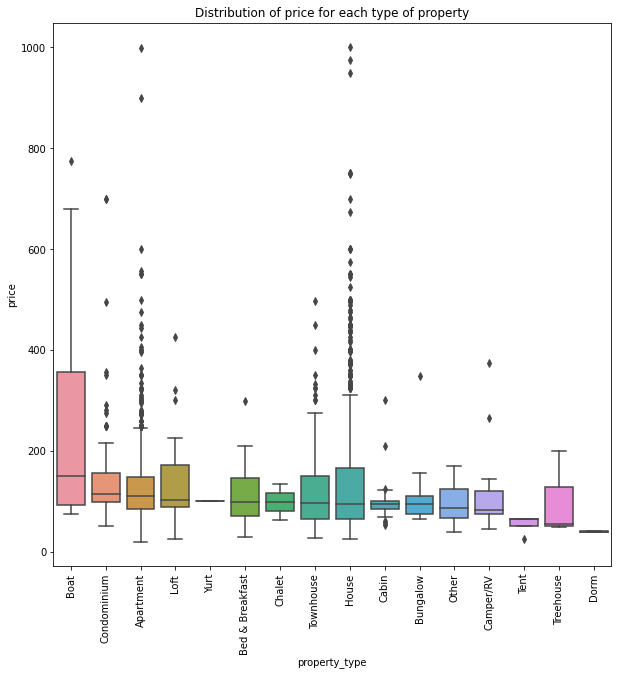

In [23]:
# Define the order of property types in box plot based on their median price. 
# Median is chosen over mean is because the price of certain properties is not normailly distributed
boxplot_order = df_listings_clean.groupby('property_type')['price'].median().sort_values(ascending=False).index

# Use box plot to study the relationship between 'property_type' and 'price'
plt.figure(figsize=[10,10])
sns.boxplot(data=df_listings_clean, x='property_type', y='price', order=boxplot_order);
plt.title('Distribution of price for each type of property')
plt.xlabel('property_type');
plt.xticks(rotation=90);
plt.ylabel('price');

As there are many different types of properties shown on the box plot, it is difficult to digest the myriad of information that is delivered by the box plot. Thus, let's try to reduce the number of property types by considering some property types as others, so that there are fewer different property types on the box plot. Based on the results obtained during data wrangling, the number of each property type in the dataset is as follows:

- House:              1733
- Apartment:          1708
- Townhouse:           118
- Condominium:          91
- Loft:                 40
- Bed & Breakfast:      37
- Other:                22
- Cabin:                21
- Bungalow:             13
- Camper/RV:            13
- Boat:                  8
- Tent:                  5
- Treehouse:             3
- Chalet:                2
- Dorm:                  2
- Yurt:                  1

'Tent', 'Treehouse' and 'Dorm' each have less than 10 instances in the dataset. Furthermore, they have similar price as 'Other', as shown on the rightmost region of the box plot above. Thus, let's consider all of them as Other

In [24]:
# Replace 'Boat', 'Tent', 'Treehouse', 'Chalet', 'Dorm' and 'Yurt' with 'Other'
replace_func = lambda x: 'Other' if x in ['Tent', 'Treehouse', 'Dorm'] else x
df_listings_clean['property_type'] = df_listings_clean['property_type'].apply(replace_func)

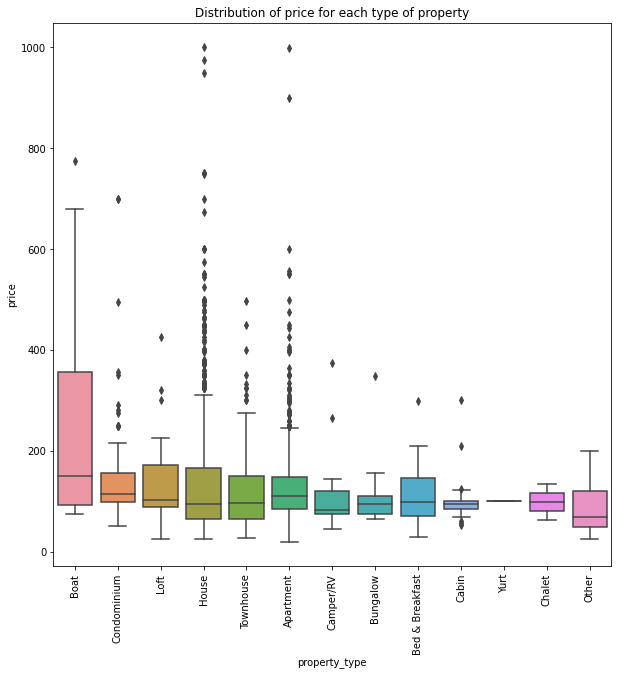

In [25]:
# Define the order of property types in box plot based on their median price
boxplot_order = df_listings_clean.groupby('property_type')['price'].mean().sort_values(ascending=False).index

# Use box plot to study the relationship between 'property_type' and 'price'
plt.figure(figsize=[10,10])
sns.boxplot(data=df_listings_clean, x='property_type', y='price', order=boxplot_order);
plt.title('Distribution of price for each type of property')
plt.xlabel('property_type');
plt.xticks(rotation=90);
plt.ylabel('price');

>Finding(s): 'Boat' has the highest the median price and 'Other' has the lowest median price among all the different types of properties. As indicated by the box plot, there is a substantial amount of outliers in the price for 'House' and 'Apartment', as compared to other types of properties. This suggests that the variation in the price of 'House' and 'Apartment' is huge. Median is chosen over mean because the price of certain types of properties is not normally distributed. 

### Question 2: How do review scores affect the price?

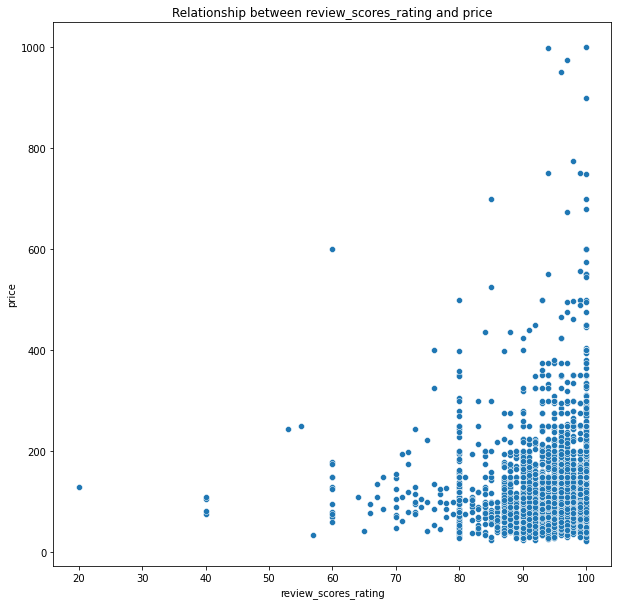

In [26]:
# Use scatter plot to study the relationship between 'review_scores_rating' and 'price'
plt.figure(figsize=[10,10])
sns.scatterplot(data=df_listings_clean, x='review_scores_rating', y='price');
plt.title('Relationship between review_scores_rating and price');
plt.xlabel('review_scores_rating');
plt.ylabel('price');

>Finding(s): Accommodations with higher price tend to have higher review_scores_rating. However, higher review_scores_rating does not always lead to higher price, as shown by the variation in price (0 - 1000) for accommodations with review_scores_rating above 90. In addition to that, lower review_scores_rating does not always to lead to lower price, as the price of accommodations with review_scores_rating lower than 50 is higher than the price of a handful of accommodations with much higher review_scores_rating. It suggests that review_scores_rating will affect the price, but the influence is minimal.

Let's delve deeper into the relationship between review_scores_rating and price by generating the same scatter plot for each type of the property separately.

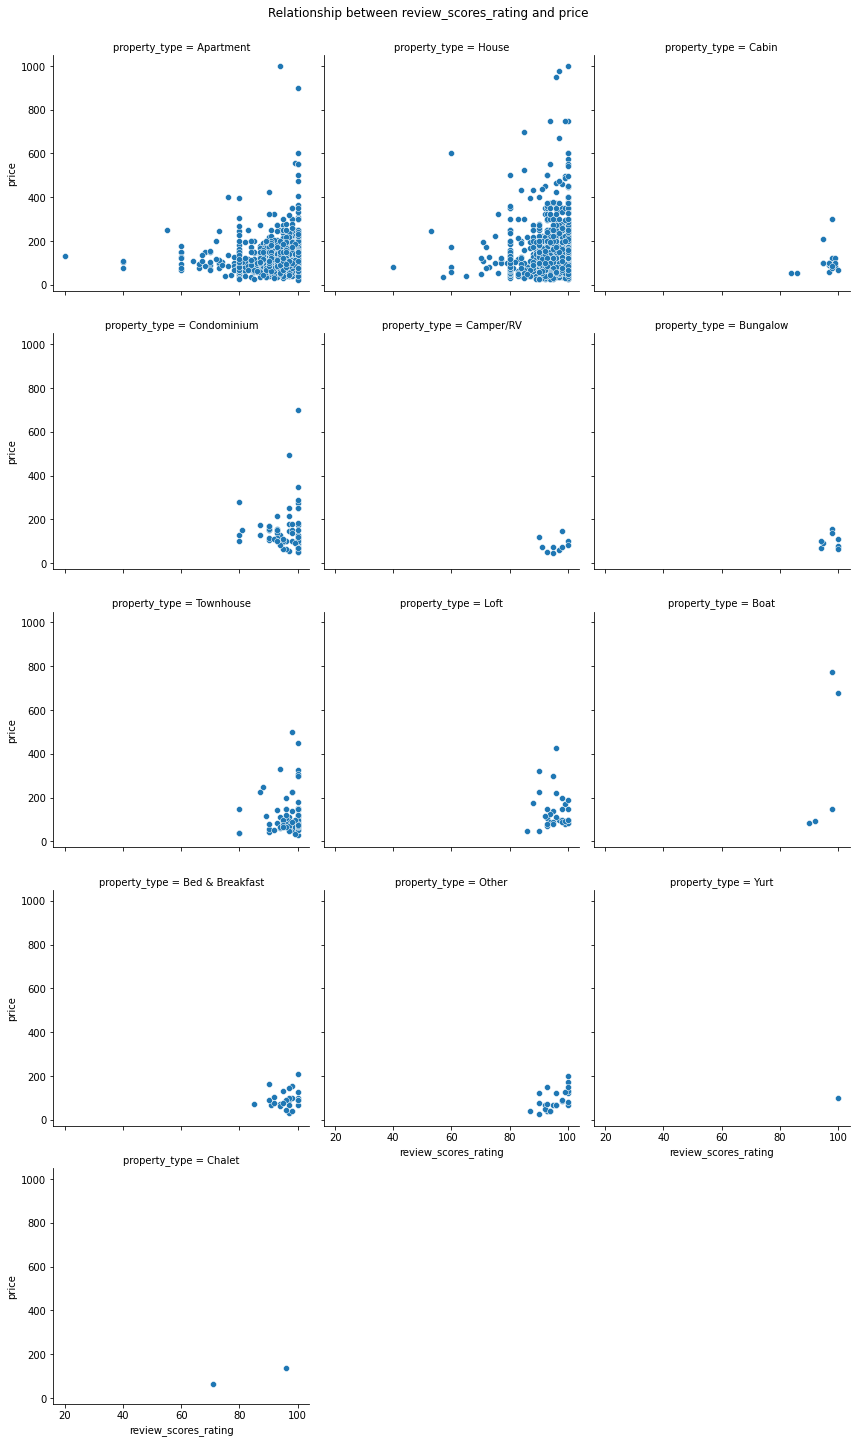

In [27]:
# Use scatter plot to study the relationship between 'review_scores_rating' and 'price' for each type of property
g = sns.FacetGrid(df_listings_clean, col='property_type', col_wrap=3, height=4, aspect=1);
g.fig.suptitle('Relationship between review_scores_rating and price', y=1);
g.map(sns.scatterplot, 'review_scores_rating', 'price');

>Finding(s): The scatter plots for Apartment and House support the two findings above. For other types of property, it was shown that most of them are priced around or below 200, and they have review_scores_rating that are higher than 80. However, the amount of data for these types of properties are substantially less than 'Apartment' and 'House'. Thus, the findings for these types of properties might not be accurate.

###  Question 3: How does price fluctuate over different months?

In [28]:
# Calculate average accommodation price for each month
monthly_price = df_calendar_clean.groupby(['date'], as_index=False)['price'].mean()

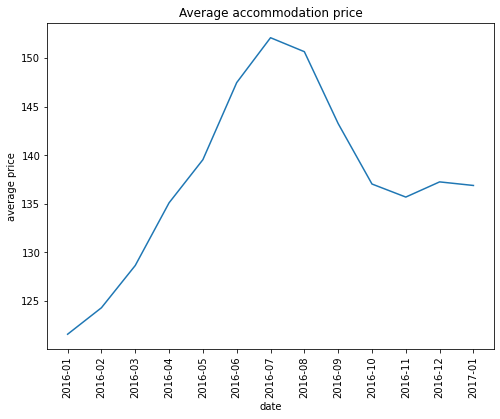

In [29]:
# Use line plot to study the trend of average accommodation price over different months
plt.figure(figsize=[8,6])
sns.lineplot(data=monthly_price , x='date', y='price');
plt.title('Average accommodation price');
plt.xlabel('date');
plt.xticks(rotation=90)
plt.ylabel('average price');

>Finding(s): The line plot above shows that average accommodation price was at its lowest in January 2016. From then on, average accommodation price rose steadily until July 2016 to reach its peak. After the peak, average accommodation price started declining. The line plot shows that the average price of accommodations in Seattle is the highest between July 2016 and August 2016.

Let's delve deeper into how average accommodation price fluctuates by generating the same line plot for each type of the property separately.

In [30]:
# Calculate average accommodation price of each type of property for each month
monthly_price_property = df_calendar_clean.groupby(['property_type', 'date'], as_index=False)['price'].mean()

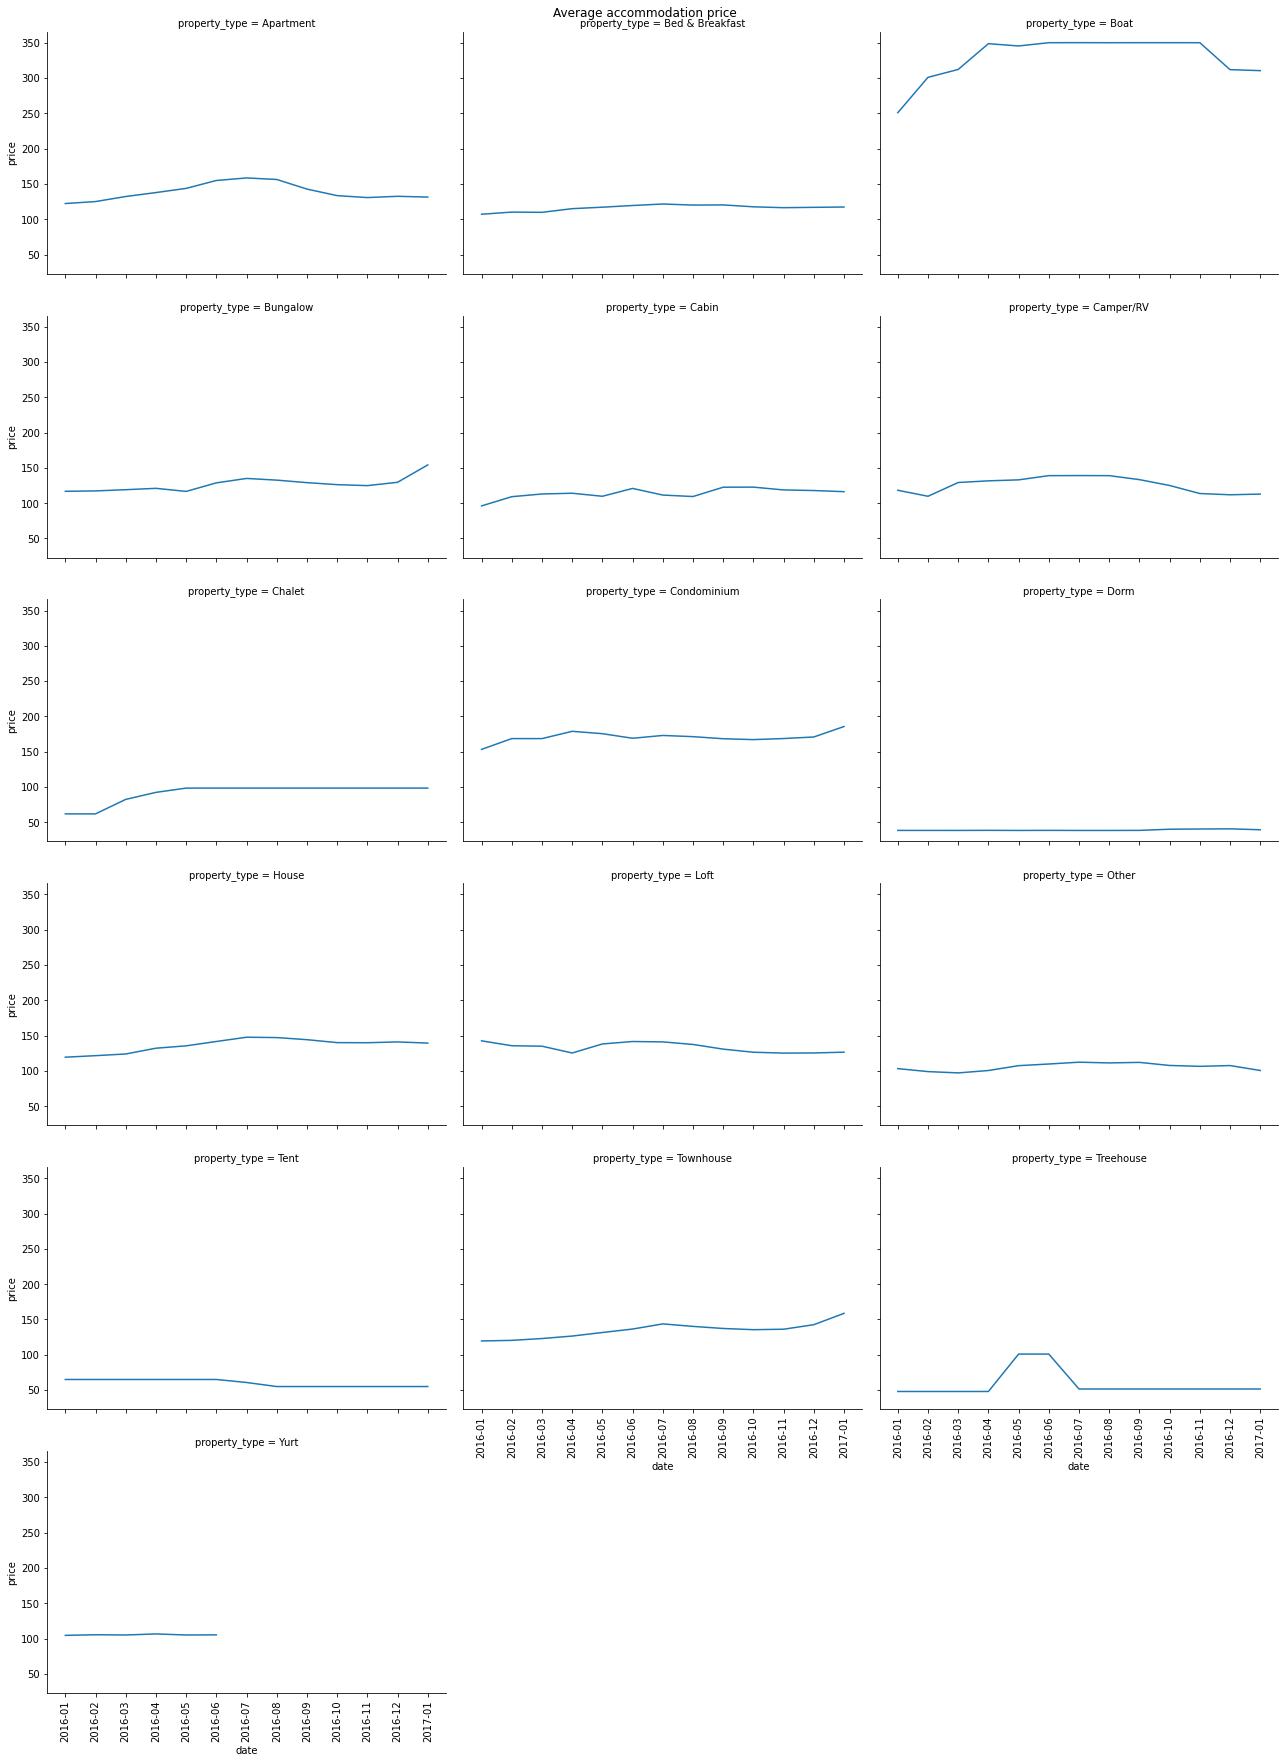

In [31]:
# Use line plot to study the trend of average accommodation price over different months for each type of property
g = sns.FacetGrid(monthly_price_property , col='property_type', col_wrap=3, height=4, aspect=1.5);
g.map(sns.lineplot, 'date', 'price');
g.fig.suptitle('Average accommodation price', y=1);
g.set_xticklabels(rotation=90);

>Finding(s): In general, the average price of all the property types is slightly higher between June 2016 and August 2016, which is during summer in Seattle. This shows that accommodations in Seattle are more expensive during summer. The increase in price during summer is likely caused by the surging demand of accommodations during summer vacation.

Let's plot the monthly occupancy of accommodations in Seattle to check if there is a surging demand of accommodations during summer.

In [32]:
# Calculate monthly occupancy
occupancy = df_calendar_clean.groupby(['available', 'date'], as_index=False)['listing_id'].count()

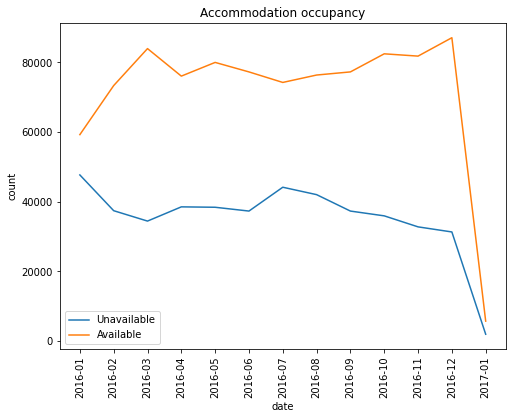

In [33]:
# Use line plot to study the fluctuation in occupancy
plt.figure(figsize=[8,6])
sns.lineplot(data=occupancy , x='date', y='listing_id', hue='available');
plt.title('Accommodation occupancy');
plt.xlabel('date');
plt.xticks(rotation=90);
plt.ylabel('count');
plt.legend(['Unavailable', 'Available']);

>Finding(s): The line plot above confirms that there is a surging demand of accommodations during summer, as the number of available accommodations is low (and the number of unavailable accommodations is high) during summer as compared to other months. The surging demand is highly likely to be the reason of increase in price during summer. Apart from summer, the number of available accommodations is also low at the beginning of the year. However, the high demand does not result in high price, which is shown by previous line plots. It is probably because of January and February are winter months. 

The sharp decline in the numbers after December 2016 is due to the reduction in the number of data collected.

<a name='conclusion'></a>
## Conclusion

Key takeaways are:
- 'Boat' has the highest median price and 'Other' has the lowest median price among all the different types of properties.
- Price of 'House' and 'Apartment' has a big variation, and the price can range from 0 to 1000.
- Accommodations with higher review_scores_rating tend to have higher price.
- Higher review_scores_rating score does not always lead to higher price and lower review_scores_rating does not always to lead to lower price. This suggests that review_scores_rating do have an influence on the price, but the influence is minimal.
- Accommodations are more expensive during summer. The surging demand of accomodations during summer is believed to the reason behind the increase in price during summer.